## Decision Tree Classifier

Decision Tree Classifiers have the same advantages and disadvantages as Decision Tree Regressors. The only difference is with the objective. We are minimizing Gini impurity:

- Gini impurity = 1 - sum(probaility of class ** 2)

You can think of gini impurity as the probability that randomly labeling an outcome is correct, i.e. our random guess is right.

In [158]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree

In [159]:
class Node:

    def __init__(self, left, right, gini_imp, feat, split, avg_class):
        self.left = left
        self.right = right
        self.gini_imp = gini_imp
        self.feat = feat
        self.split = split
        self.avg_class = avg_class


class DecisionTreeClassifer:

    def __init__(self, max_depth=3, min_samples_split=5):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
    
    def calc_gini_impurity(self, data, target_col):

        labels = data[target_col].unique()

        class_dist = [len(data[data[target_col] == lbl]) for lbl in labels]

        return 1 - sum([(cls_dist/len(data))**2 for cls_dist in class_dist])

    def fit(self, data, target_col):

        self.root = self._fit(data, target_col, float("inf"), 0)
    
    def _fit(self, data, target_col, parent_gini_imp, depth):

        if len(data) < self.min_samples_split or depth >= self.max_depth:

            print(f"Leaf node. Gini {parent_gini_imp}, Prediction {data[target_col].mode()[0]}")

            return Node(None, None, parent_gini_imp, None, None, data[target_col].mode()[0])

        features = [x for x in data.columns if x != target_col]

        best_feat, best_split = None, None
        best_gini_imp = parent_gini_imp

        for feat in features:

            uniques = sorted(data[feat].unique())

            for i in range(1, len(uniques)):

                split = (uniques[i] + uniques[i - 1]) / 2

                left_region = data[data[feat] < split]
                right_region = data[data[feat] >= split]

                total_gini_imp = (len(left_region)/len(data))*self.calc_gini_impurity(left_region, target_col) + (len(right_region)/len(data))*self.calc_gini_impurity(right_region, target_col)

                if total_gini_imp < best_gini_imp:
                    
                    best_feat, best_split = feat, split
                    best_gini_imp = total_gini_imp
        
        if not best_feat:

            print(f"Leaf node. Gini {parent_gini_imp}, Prediction {data[target_col].mode()[0]}")

            return Node(None, None, best_gini_imp, None, None, data[target_col].mode()[0])
        
        node = Node(None, None, best_gini_imp, best_feat, best_split, data[target_col].mode()[0])

        print(f"Node Gini imp {best_gini_imp}, Node best feat {best_feat}, Node best split {best_split}, Node avg class {data[target_col].mode()[0]}, Node depth {depth}")
        node.left = self._fit(data[data[best_feat] < best_split], target_col, best_gini_imp, depth+1)
        node.right = self._fit(data[data[best_feat] >= best_split], target_col, best_gini_imp, depth+1)
        return node

    def predict(self, data):

        return np.array([self._predict(obs[1]) for obs in data.iterrows()])

    def _predict(self, obs):

        if not self.root:

            print("Model not fitted")

            return

        curr = self.root

        while curr.left and curr.right:

            split, feat = curr.split, curr.feat

            if obs[feat] < split:

                curr = curr.left
            
            else:

                curr = curr.right
        return curr.avg_class

In [160]:
# def mse(y_true, y_hat):

#     return np.mean((y_true - y_hat)**2)

# def rmse(y_true, y_hat):

#     return np.sqrt(np.mean((y_true - y_hat)**2))

def accuracy(y_true, y_hat):

    return sum(y_true == y_hat) / len(y_true)
    






In [161]:
np.random.seed(42)

wines = load_wine(as_frame=True)
data = pd.concat([wines["data"], wines["target"]], axis=1)
data = data.sample(frac=1)
data.reset_index(inplace=True, drop=True)
data

# breast_cancer = load_breast_cancer(as_frame=True)
# data = pd.concat([breast_cancer["data"], breast_cancer["target"]], axis=1)
# data = data.sample(frac=1)
# data.reset_index(inplace=True, drop=True)
# data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,0
1,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,0
2,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2
3,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0
4,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0,1
174,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,1
175,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0
176,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,1


In [162]:
train_size = 0.8

train_data = data.iloc[:int(len(data)*train_size)]
test_data = data.iloc[int(len(data)*train_size):]

target_col = "target"

print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (142, 14)
Test Data Shape:  (36, 14)


In [163]:
max_depth, min_samples = 3, 5

my_cls = DecisionTreeClassifer(max_depth, min_samples)
sklearn_cls = DTC(max_depth=max_depth, min_samples_split=min_samples)

In [164]:
my_cls.fit(train_data, target_col)
sklearn_cls.fit(train_data[[f for f in train_data.columns if f != target_col]], train_data[target_col])

Node Gini imp 0.3983016180611333, Node best feat proline, Node best split 755.0, Node avg class 1, Node depth 0
Node Gini imp 0.16602218006712394, Node best feat flavanoids, Node best split 1.2349999999999999, Node avg class 1, Node depth 1
Node Gini imp 0.0, Node best feat color_intensity, Node best split 3.56, Node avg class 2, Node depth 2
Leaf node. Gini 0.0, Prediction 1
Leaf node. Gini 0.0, Prediction 2
Node Gini imp 0.06873315363881409, Node best feat color_intensity, Node best split 6.425, Node avg class 1, Node depth 2
Leaf node. Gini 0.06873315363881409, Prediction 1
Leaf node. Gini 0.06873315363881409, Prediction 2
Node Gini imp 0.10251572327044009, Node best feat total_phenols, Node best split 1.925, Node avg class 0, Node depth 1
Node Gini imp 0.0, Node best feat malic_acid, Node best split 2.085, Node avg class 2, Node depth 2
Leaf node. Gini 0.0, Prediction 1
Leaf node. Gini 0.0, Prediction 2
Node Gini imp 0.0, Node best feat magnesium, Node best split 135.5, Node avg cl

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [165]:
my_cls_preds = my_cls.predict(test_data)
sklearn_cls_preds = sklearn_cls.predict(test_data[[f for f in test_data.columns if f != target_col]])

pd.DataFrame(data={"Accuracy": [accuracy(test_data[target_col], my_cls_preds), accuracy(test_data[target_col], sklearn_cls_preds)]}, index=["My DTC", "Sklearn's DTC"])

,Accuracy
My DTC,0.944444
Sklearn's DTC,0.944444


[Text(0.5, 0.875, 'proline <= 755.0\ngini = 0.657\nsamples = 142\nvalue = [48, 57, 37]'),
 Text(0.25, 0.625, 'flavanoids <= 1.235\ngini = 0.494\nsamples = 89\nvalue = [2, 54, 33]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'color_intensity <= 3.56\ngini = 0.165\nsamples = 33\nvalue = [0, 3, 30]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]'),
 Text(0.375, 0.375, 'hue <= 0.65\ngini = 0.166\nsamples = 56\nvalue = [2, 51, 3]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4375, 0.125, 'gini = 0.073\nsamples = 53\nvalue = [2, 51, 0]'),
 Text(0.75, 0.625, 'flavanoids <= 1.605\ngini = 0.238\nsamples = 53\nvalue = [46, 3, 4]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'total_phenols <= 1.24\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 4\nva

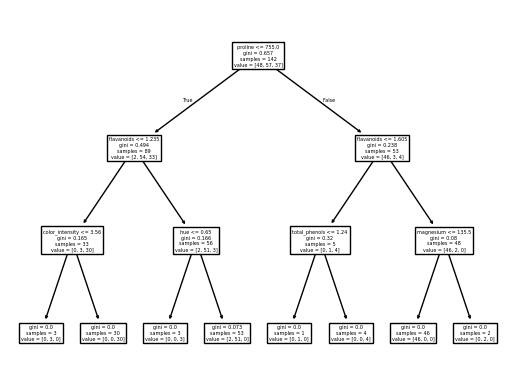

In [166]:
plot_tree(sklearn_cls, feature_names=train_data.columns)